# 5502 Data Mining Final Project

Collaborators: John Palmer, Jamie Voros, Warren Fulton


### Midterm review
In this notebook, we pull data from our .csv files into the Jupyter Notebook environment.

We are using Kaggle's [Crude Oil](https://www.kaggle.com/awadhi123/crude-oil-stock-price) data to begin with and plan to pull in several more databases containing market data.

In [1]:
import pandas as pd

crudeOilDF = pd.read_csv (r'crudeoil.csv')
crudeOilDF.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
3,2000-03-26,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0


In [2]:
import pandas as pd

BTCdf = pd.read_csv (r'CRYUSD/BTCUSD.csv')
BTCdf.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 11, 2020","15,756.8","15,303.1","15,953.9","15,281.0",112.35K,2.96%
1,"Nov 10, 2020","15,303.6","15,328.0","15,465.3","15,096.5",93.36K,-0.15%
2,"Nov 09, 2020","15,327.2","15,483.3","15,819.6","14,816.9",165.04K,-1.01%
3,"Nov 08, 2020","15,483.7","14,826.6","15,648.3","14,720.7",94.99K,4.42%
4,"Nov 07, 2020","14,828.4","15,578.2","15,754.4","14,385.1",160.73K,-4.81%


In [15]:
ETHdf = pd.read_csv (r'CRYUSD/ETHUSD.csv')
ETHdf.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 11, 2020",466.60,450.65,474.15,450.65,97.93K,3.54%
1,"Nov 10, 2020",450.65,444.53,452.89,443.06,45.81K,1.38%
2,"Nov 09, 2020",444.53,455.17,456.67,441.48,70.69K,-2.34%
3,"Nov 08, 2020",455.17,435.96,456.74,435.96,67.84K,4.41%
4,"Nov 07, 2020",435.96,455.59,463.66,432.17,234.67K,-4.31%


In [96]:
ETHdf.tail()

,Date,Price,Open,High,Low,Vol.,Change %,DateNumeric
1703,"Mar 14, 2016",12.50,15.07,15.07,11.40,26.34K,-17.05%,2016-03-14
1704,"Mar 13, 2016",15.07,12.92,15.07,12.92,0.37K,16.64%,2016-03-13
1705,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.24K,8.12%,2016-03-12
1706,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.05K,1.70%,2016-03-11
1707,"Mar 10, 2016",11.75,11.20,11.85,11.07,0.00K,4.91%,2016-03-10


In [97]:
BTCdf.head()

,Date,Price,Open,High,Low,Vol.,Change %,DateNumeric
0,"Nov 11, 2020","15,756.8","15,303.1","15,953.9","15,281.0",112.35K,2.96%,2020-11-11
1,"Nov 10, 2020","15,303.6","15,328.0","15,465.3","15,096.5",93.36K,-0.15%,2020-11-10
2,"Nov 09, 2020","15,327.2","15,483.3","15,819.6","14,816.9",165.04K,-1.01%,2020-11-09
3,"Nov 08, 2020","15,483.7","14,826.6","15,648.3","14,720.7",94.99K,4.42%,2020-11-08
4,"Nov 07, 2020","14,828.4","15,578.2","15,754.4","14,385.1",160.73K,-4.81%,2020-11-07


In [148]:
def pairsAnalysis(df1, df2, purchase = 100, window=10, daysBetweenFlatten = 5):
    
    """
    df1: data frame, containing trades data of product 1
    df2: data frame, containing trades data of product 2
         Product 1 and 2 must be in the same currency
    purchase: float, the amoutn we buy and sell each day
    window: int, number of days in window
    """
    
    from datetime import datetime, timedelta
    import pandas as pd
    
    try:
        dates1 = pd.to_datetime(df1['Date'])
        dates2 = pd.to_datetime(df2['Date'])
        startDate = max(min(dates1), min(dates2))
        endDate = min(max(dates1),max(dates2))
    except:
        print('Formatting error')
        return
    
    assert startDate < endDate, 'No date overlap'
    
    df1['DateNumeric'] = dates1
    df2['DateNumeric'] = dates2
    
    position1 = 0
    position2 = 0
    PnL = 0
    
    PnLvec = []
    position1vec = []
    position2vec = []
    price1vec = []
    price2vec = []
    
    i=0
    
    for Date in daterange(startDate, endDate - timedelta(days = window)):
        windowStart = Date
        windowEnd = Date + timedelta(days = window)
    
        df1Trim = df1[(df1['DateNumeric'] >= windowStart) & (df1['DateNumeric'] < windowEnd)]
        df2Trim = df2[(df2['DateNumeric'] >= windowStart) & (df2['DateNumeric'] < windowEnd)]
        
        prices1 = [float(x.replace(',','')) for x in list(df1Trim['Price'])]
        prices2 = [float(x.replace(',','')) for x in list(df2Trim['Price'])]
        
        totalDiff = sum(prices1) - sum(prices2)
        avgDiff = totalDiff/window
        
        price1 = float(list(df1[(df1['DateNumeric'] == windowEnd)]['Price'])[0].replace(',',''))
        price2 = float(list(df2[(df2['DateNumeric'] == windowEnd)]['Price'])[0].replace(',',''))
        diff = price1 - price2
        
        if diff > avgDiff:
            position2 += 100/price2
            position1 -= 100/price1

        elif diff < avgDiff:
            position1 += 100/price1
            position2 -= 100/price2
        else:
            pass
        
        if i %daysBetweenFlatten == 0:
            PnL += price1*position1*-1 + price2*position2*-1  
            position1 = 0
            position2 = 0
            
        PnLvec.append(PnL)
        position1vec.append(position1)
        position2vec.append(position2)
        price1vec.append(price1)
        price2vec.append(price2)
        i += 1
    
    if position1 != 0:
        PnL += price1vec[-1]*position1*-1 + price2vec[-1]*position2*-1  
        position1 = 0
        position2 = 0
        
        PnLvec.append(PnL)
        position1vec.append(position1)
        position2vec.append(position2)
        
    return PnLvec, position1vec, position2vec, price1vec, price2vec


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)     

In [149]:
PnLvec, position1vec, position2vec, price1vec, price2vec = pairsAnalysis(BTCdf, ETHdf, purchase = 10000, window=10, daysBetweenFlatten = 5)

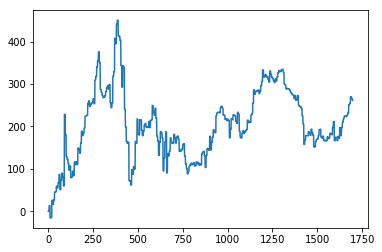

In [151]:
import matplotlib.pyplot as plt

plt.plot(PnLvec)
